In [22]:
from pathlib import Path
import datetime as dt
import pandas as pd
import numpy as np

In [24]:
df_ca = pd.read_csv(Path("../../../data/processed_data/ca_cleaned_ev_stations_data.csv"))

# List of specified counties
specified_counties = ['Los Angeles County', 'San Diego County', 'Orange County', 'Riverside County', 'San Bernardino County']

# Create a new column 'cleaned_county' to store the cleaned county names
df_ca['cleaned_county'] = df_ca['county']

# Replace the county names not in the specified list with 'Other California Counties'
df_ca.loc[~df_ca['county'].isin(specified_counties), 'cleaned_county'] = 'Other California Counties'

# Group by 'year' and 'cleaned_county' and sum the 'ev_station_count' and 'cumulative_ev_stations'
cleaned_df = df_ca.groupby(['year', 'cleaned_county']).sum().reset_index()

# Drop the 'county' column and rename the 'cleaned_county' column back to 'county'
cleaned_df.drop('county', axis=1, inplace=True)
cleaned_df.rename(columns={'cleaned_county': 'county'}, inplace=True)

cleaned_df

,year,county,ev_station_count,cumulative_ev_stations
0,1995,Los Angeles County,1,1
1,1996,Los Angeles County,1,2
2,1997,Los Angeles County,4,6
3,1997,Riverside County,1,1
4,1997,San Diego County,1,1
...,...,...,...,...
101,2024,Orange County,88,1900
102,2024,Other California Counties,845,8710
103,2024,Riverside County,42,603
104,2024,San Bernardino County,84,502


In [26]:
# Save the cleaned data to a new CSV file
cleaned_df.to_csv('ca_cleaned_ev_stations_topfive_data.csv', index=False)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df_ca_topfive = pd.read_csv(Path("../../../data/processed_data/ca_cleaned_ev_stations_topfive_data.csv"))

df_ca_topfive

,year,county,ev_station_count,cumulative_ev_stations
0,1995,Los Angeles County,1,1
1,1996,Los Angeles County,1,2
2,1997,Los Angeles County,4,6
3,1997,Riverside County,1,1
4,1997,San Diego County,1,1
...,...,...,...,...
101,2024,Orange County,88,1900
102,2024,Other California Counties,845,8710
103,2024,Riverside County,42,603
104,2024,San Bernardino County,84,502


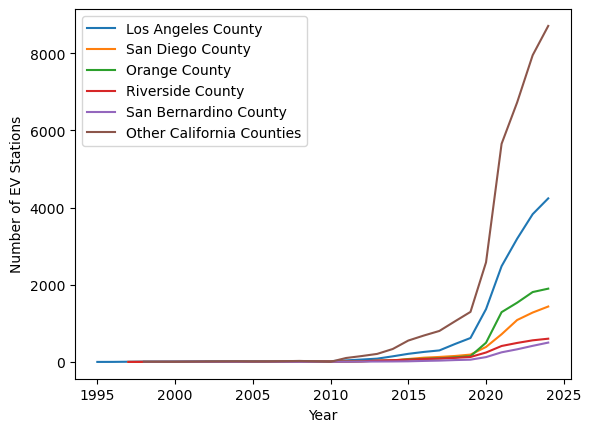

In [39]:
# Create a separate plot for each county
counties = ['Los Angeles County', 'San Diego County', 'Orange County', 'Riverside County', 'San Bernardino County', 'Other California Counties']

fig, ax = plt.subplots()
for county in counties:
    county_data = df_ca_topfive[df_ca_topfive['county'] == county]
    ax.plot(county_data['year'], county_data['cumulative_ev_stations'], label=county)

# Add labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Number of EV Stations')
ax.legend()

# Show the plot
plt.show()

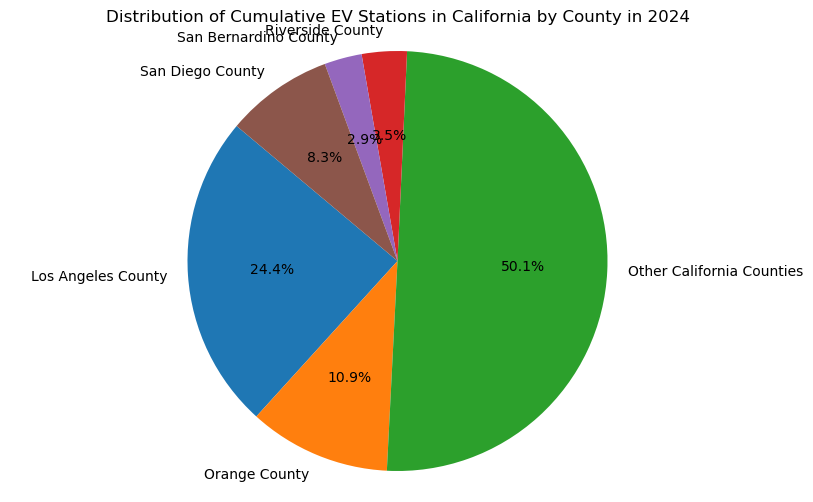

In [32]:
# Create a pie chart to visualize the distribution of 'cumulative_ev_stations' by county for the latest year in the data
latest_year = df_ca_topfive['year'].max()
latest_data = df_ca_topfive[df_ca_topfive['year'] == latest_year]

plt.figure(figsize=(10, 6))
plt.pie(latest_data['cumulative_ev_stations'], labels=latest_data['county'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title(f'Distribution of Cumulative EV Stations in California by County in {latest_year}')
plt.show()

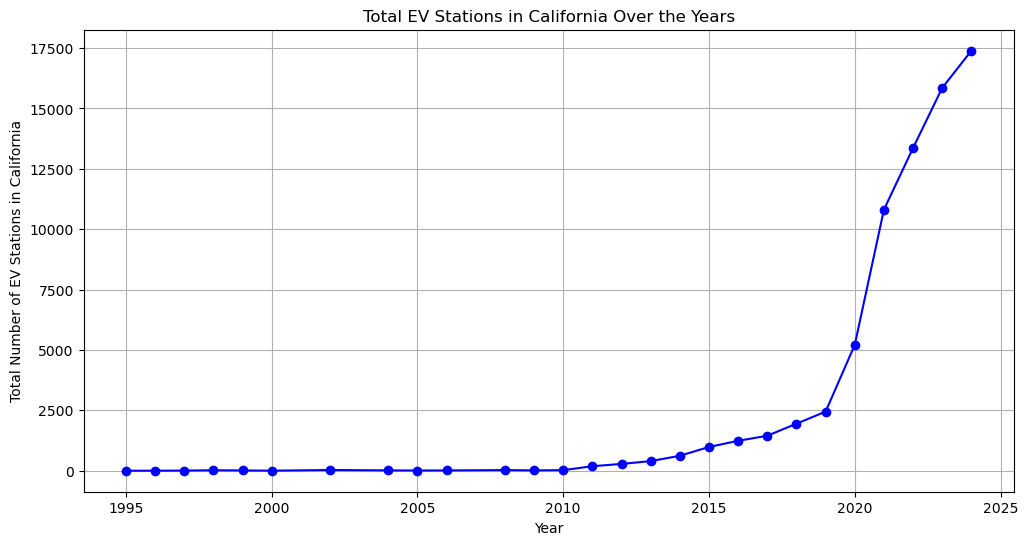

In [45]:
# Group by 'year' and sum the 'cumulative_ev_stations' for all counties
total_ca_data = df_ca_topfive.groupby('year')['cumulative_ev_stations'].sum().reset_index()

# Plot the progression graph
plt.figure(figsize=(12, 6))
plt.plot(total_ca_data['year'], total_ca_data['cumulative_ev_stations'], marker='o', color='b', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Number of EV Stations in California')
plt.title('Total EV Stations in California Over the Years')

# Show the plot
plt.grid(True)
plt.show()

In [47]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model using the historical data
model.fit(total_ca_data[['year']], total_ca_data['cumulative_ev_stations'])

# Predict the number of EV stations in California for the year 2030
predicted_2030 = model.predict([[2030]])

print(f"Predicted number of EV stations in California by 2030: {int(predicted_2030[0])}")

Predicted number of EV stations in California by 2030: 10504


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


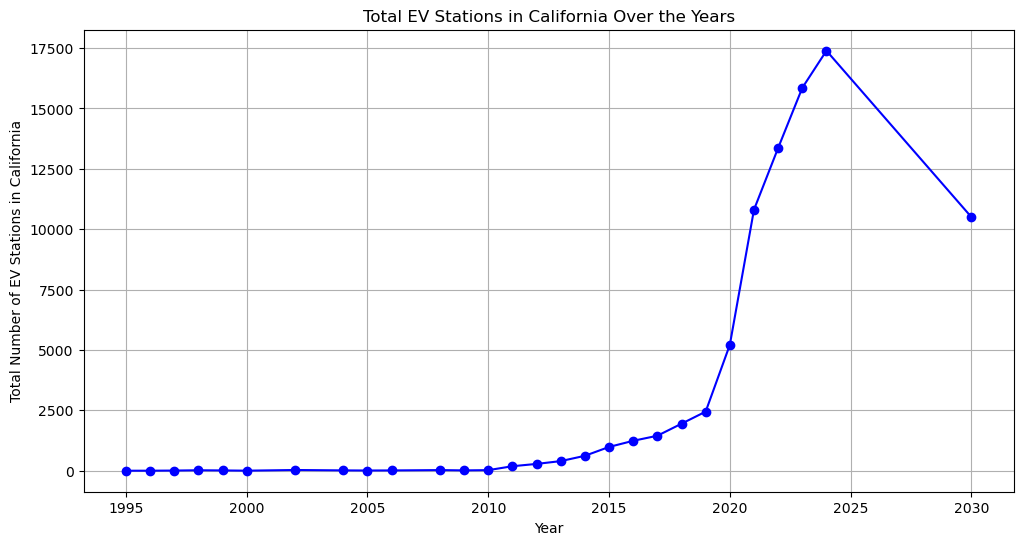

In [51]:
# Add the predicted value for 2030 to the total_ca_data DataFrame
predicted_row = pd.DataFrame({'year': [2030], 'cumulative_ev_stations': predicted_2030})
total_ca_data = pd.concat([total_ca_data, predicted_row], ignore_index=True)

# Plot the progression graph with the predicted value
plt.figure(figsize=(12, 6))
plt.plot(total_ca_data['year'], total_ca_data['cumulative_ev_stations'], marker='o', color='b', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Number of EV Stations in California')
plt.title('Total EV Stations in California Over the Years')

# Show the plot
plt.grid(True)
plt.show()